У нас есть две таблицы

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')
print(user_data)
print()
print(logs)

      client  premium  age
0      46346    False   58
1       4391    False   55
2      27372    False   64
3      11989    False   44
4      60664    False   49
...      ...      ...  ...
2949   19411    False   29
2950   61579    False   50
2951   61221     True   64
2952   29863    False   46
2953   78499    False   36

[2954 rows x 3 columns]

      client  success  platform        time
0      40177     True     phone  1585412212
1      61468     True     phone  1585425658
2      35604    False     phone  1585459894
3       9961     True     phone  1585400189
4      10931     True  computer  1585468629
...      ...      ...       ...         ...
4495   64496    False  computer  1585459072
4496   73299     True     phone  1585458370
4497    8967     True     phone  1585465121
4498   52880    False     phone  1585455362
4499   40921     True     phone  1585437692

[4500 rows x 4 columns]


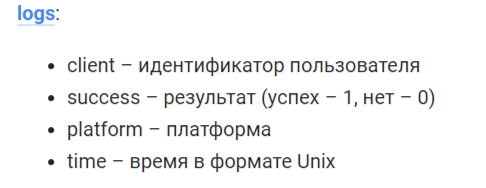

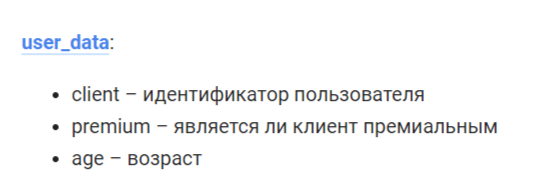

Узнаем какие пользвоваетли совершали наибольшее  число целевых действий

In [ ]:
by_client = logs.groupby('client', as_index=False).agg({'success': 'sum'}).sort_values('success', ascending=False)
print(by_client.head(15))
#возьмем порого в 40 целевых действий и выведем id нужных клиентов по возрастанию
print(np.array(sorted(by_client[by_client['success'] >= 40]['client'].to_numpy())))

      client  success
3300   82563       41
1426   36165       41
2095   52870       41
468    12179       41
2469   61473       41
3141   78349       41
1120   28719       41
2468   61468       41
3712   92584       41
2562   64064       40
3189   79320        3
3318   82804        2
3915   97489        2
2909   72479        2
2849   71269        2
[12179 28719 36165 52870 61468 61473 64064 78349 82563 92584]


Узнаем, с какой платформы было совершено наибольшее количество успешных операций

In [ ]:
by_platforms = logs.groupby('platform', as_index= False).agg({'success': 'sum'})
print(by_platforms)


   platform  success
0  computer     1090
1     phone     2019
2    tablet      180


Заметим, что это phone

Узнаем, какая платформа наиболее популярна среди премиумных клиентов



In [ ]:
joint_df = logs.merge(user_data, on='client')
joint_df = joint_df[joint_df['premium']]
by_pltf = joint_df.groupby('platform').agg({'success': 'sum'})
print(by_pltf)


          success
platform         
computer      108
phone         177
tablet         18


Заметим, что и тут тоже phone

Визуализируем распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

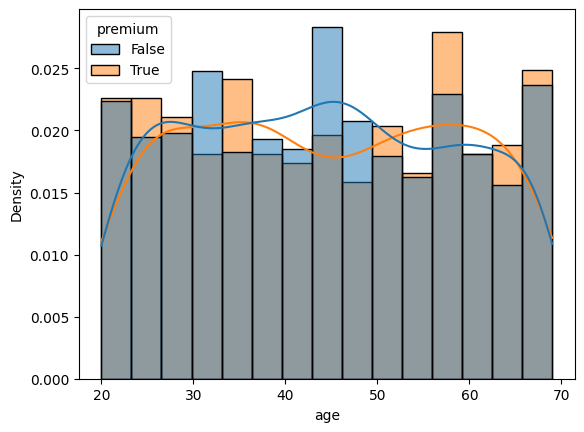

In [ ]:
sns.histplot(data=user_data, x='age', hue='premium', stat='density', common_norm=False, kde= True) # благодаря  common_norm=False у нас ну учитывается разница масштаба ( кол-ва)
plt.show()

Построим график распределения числа успешных операций